## Project Objectives

Air BnB has become a popular sourse of short-term stays for modern travellers. Pricing and quality service are critically crucial in an individual’s decision-making process of whether to go with an AirBnB listing. Additionally, these elements are also crucial for hosts in their process of maximizing returns. Having an opportunity to observe the Seattle Airbnb dataset and identify some of the factors that affect listing prices and host service delivery is intriguing.

The data is inform of 3 datasets namely:

*listings.csv* - has all the listings in Seattle including full descriptions and average review score

*calendar.csv* - contains listing id and the price and availability for that day

*reviews.csv* - has all the reviews for these listings including unique id for each reviewer and detailed comments

The objectives of this project is to understand various patterns related to pricing and quality of hosting service and their relationship to various categorical variables. To achieve this objective, I will explore the following related questions:

     1. Can the response time be used as a measure of quality based on the corresponding review scores?-This can be used by future clients who want to have a quick check on the quality of service for various hosts.
    
    2. Do superhosts tend to charge more that the non-superhosts? -This can help prospective clients to select which type of host they would like to contact. Additionally, if there is a clear distinction in terms of pricing, it could help predict the pricing
    
    3. What property type are more people interested in and does it affect the pricing?-This can help prospective host to estimate the probability of demand for their proterty

### Project Plan and Stages

**Libraries**: The first stage of the project will be importing the necessary python libraries to enhance loading the data, cleaning the data and visualize the data.

**Understand the Data**: After loading the data, I will perform basic exploratory analysis for the data to have a better understanding and also shape my analysis methodology. Additionally, I will assess the data quality to enhance the quality of my analysis.

**Feature Engineering**: This step entails data cleaing, feature engineering that involves creating new feature sneeded for analysis and integrating data through merging.

**Analysis of the Business Questions**: This section will involve analyzing the business questions to get the insights

**Conclusion of Analysis**: This part involves analyzing the results from the 3 business questions

## Libraries

In [33]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
from re import sub
from decimal import Decimal

## Load the data

In [4]:
#Load the data
listing_df = pd.read_csv('listings.csv', dtype=str)
calendar_df = pd.read_csv('calendar.csv', dtype=str)
reviews_df = pd.read_csv('reviews.csv', dtype=str)

## Data Understanding

### Listing Data

In [5]:
print(f"The listing dataset has {listing_df.shape[0]} columns and {listing_df.shape[1]} rows")
listing_df.head(2)

The listing dataset has 3818 columns and 92 rows


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3,3,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289038357184,-122.37102519997765,t,Apartment,Entire home/apt,4,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95,10,10,10,10,9,10,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6,6,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.63912312136253,-122.36566646439582,t,Apartment,Entire home/apt,4,1.0,1,1,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96,10,10,10,10,10,10,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


Since the business questions will not involve all the 92 columns, I selected the following columns for exploration.

In [14]:
#Subset to the columns needed to answer the questions
new_df = listing_df[['id','host_response_time', 'host_response_rate', 
                    'price', 'guests_included', 'extra_people', 'minimum_nights',
                    'number_of_reviews','review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month',
                    'host_is_superhost', 'property_type']]
new_df.shape

(3818, 17)

In [15]:
#There are 3818 listings meaning all listing ids are unique
new_df['id'].nunique()

3818

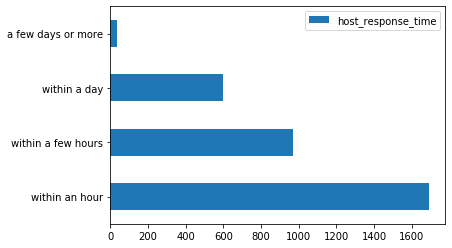

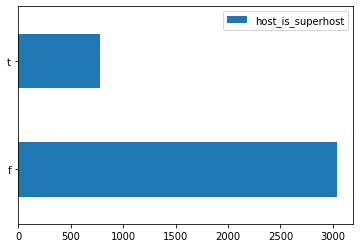

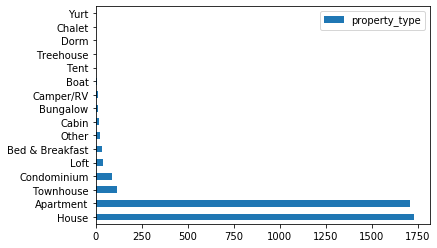

In [16]:
#Get the value_counts of categorical columns and plot them
cat_cols = ['host_response_time', 'host_is_superhost', 'property_type']
for col in cat_cols:
    df = pd.DataFrame(new_df[col].value_counts())
    df.plot.barh()

In the above column, the most popular response rate was within an hour, the most popular hosts are the ones that were not superhosts and the most common property type was a house

### Review Data

In [18]:
#Get the number of columns and rows in the reviews data
print(f"The reviews dataset has {reviews_df.shape[0]} columns and {reviews_df.shape[1]} rows")
reviews_df.head(2)

The reviews dataset has 84849 columns and 6 rows


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


In [21]:
#Get the range of reviews dates
pd.to_datetime(reviews_df['date']).describe()

count                   84849
unique                   1930
top       2015-09-21 00:00:00
freq                      580
first     2009-06-07 00:00:00
last      2016-01-03 00:00:00
Name: date, dtype: object

As shown above, the reviews were from 2009-06-07 to 2016-01-03

### Calendar Data

In [22]:
#Check unique listings
print(f"The calendar dataset has {calendar_df.shape[0]} columns and {calendar_df.shape[1]} rows")
calendar_df.head(2)

The calendar dataset has 1393570 columns and 4 rows


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


## Feature Engineering and Data Cleaning

In this section I will get crucial elements needed for the analysis as follows:

    1. Get the number of reviewers per listing from the reviews data - This will be used to get the popularity of the listings and associated property types
    
    2. Get the median price per listing. This will involve some data cleaning to remove the dollar sign from the prices and converting it to float using re and Decimal libraries. Additionally, it will involve removing nuull entries in the price column because those listings are not available.
    
    3. Merging the above 2 dataframes and them merging them to the listing dataframe that contains the columns chose in the earlier stage
    
    4. Cleaning up the data such as removing dollar sign using re, chaning necessary float columns to float

### Getting number of reviewers per listing

In [39]:
#Get number of reviewers per listing
reviewers_count_df = pd.DataFrame(reviews_df.groupby('listing_id')['reviewer_id'].count())

reviewers_count_df.rename(columns={"reviewer_id": "reviewers_count"}, inplace=True)

reviewers_count_df.head(2)

,reviewers_count
listing_id,
1000883,18
10012724,2


In [37]:
reviewers_count_df.describe()

,reviewers_Count
count,"3,191.00"
mean,26.59
std,39.84
min,1.00
25%,4.00
50%,13.00
75%,31.00
max,474.00


Using the describe method above, it shows that a the minimum number of revierws per listing is 1 while the maximum is 474

### Get median price per listing from the calendar data

In [34]:
#Choose only the available listings because unavialable listings have null entries in the price feature
available_listings = calendar_df[calendar_df['available']== 't']

#removong the $ sign and Changing currency to float
available_listings['price_float'] = available_listings['price'].apply(lambda x: float(Decimal(sub(r'[^\d.]', '', x))))

print(f"Calendar Dataset rows before removing unavilable prices: {calendar_df.shape[0]},Dataset after removing unavilable prices:  {available_listings.shape[0]}")

available_listings.head(2)

Calendar Dataset rows before removing unavilable prices: 1393570,Dataset after removing unavilable prices:  934542


,listing_id,date,available,price,price_float
0,241032,2016-01-04,t,$85.00,85.00
1,241032,2016-01-05,t,$85.00,85.00


In [35]:
#Get the mean and median price for every listing id
mean_median_df = available_listings.groupby('listing_id').agg({'price_float': ['median']})

#Flatten the hierarchical columns
mean_median_df.columns = mean_median_df.columns.get_level_values(1)

print(mean_median_df.shape)

mean_median_df.head(2)

(3723, 1)


,median
listing_id,
10000273,175.00
1000883,100.00


### Merging median price dataframe with reviewers count per listing dataframe

In [40]:
#Merge reviewers count and median price dataframes
merged_df = reviewers_count_df.merge(mean_median_df, left_index=True, right_index=True)

#Rename the median column
merged_df.rename(columns = {'median': 'median_price'}, inplace=True)
print(merged_df.shape)
merged_df.head(2)

(3121, 2)


,reviewers_count,median_price
listing_id,,
1000883,18,100.00
10012724,2,25.00


### Merging the above dataframe to the listing dataframe

In [41]:
#Merge listing dataframe with the median price and reviewer count dataframe
new_df.set_index('id', inplace=True)
new_df_final = merged_df.merge(new_df, right_index=True, left_index=True)
new_df_final.head(2)

,reviewers_count,median_price,host_response_time,host_response_rate,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_is_superhost,property_type
1000883,18,100.00,within a few hours,86%,$100.00,3,$0.00,2,18,99,10,10,10,10,10,0.59,f,House
10012724,2,25.00,within an hour,100%,$25.00,1,$0.00,1,2,100,10,10,10,10,10,2,f,Apartment


In [42]:
new_df_final.isna().sum()

reviewers_count                  0
median_price                     0
host_response_time             290
host_response_rate             290
price                            0
guests_included                  0
extra_people                     0
minimum_nights                   0
number_of_reviews                0
review_scores_rating            20
review_scores_cleanliness       26
review_scores_checkin           31
review_scores_communication     24
review_scores_location          28
review_scores_value             29
reviews_per_month                0
host_is_superhost                0
property_type                    0
dtype: int64

### Remove nulls based on the response time attribute since it will be important for analysis

In [43]:
#remove nulls
last_df = new_df_final.dropna(subset=['host_response_time'])
last_df.shape

(2831, 18)

### Cleaning up the columns

In [44]:
last_df.head()

,reviewers_count,median_price,host_response_time,host_response_rate,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_is_superhost,property_type
1000883,18,100.00,within a few hours,86%,$100.00,3,$0.00,2,18,99,10,10,10,10,10,0.59,f,House
10012724,2,25.00,within an hour,100%,$25.00,1,$0.00,1,2,100,10,10,10,10,10,2,f,Apartment
10020221,1,55.00,within an hour,100%,$55.00,1,$0.00,1,1,100,10,10,10,10,10,1,f,House
1002835,6,135.00,within a day,70%,$135.00,4,$20.00,2,6,80,8,7,8,10,8,0.31,f,Apartment
1003890,72,99.00,within an hour,100%,$99.00,3,$25.00,2,72,93,10,10,10,9,9,2.20,f,House


In [45]:
#Cleaning up the number columns: Remove percentage sign
#host_response_rate
last_df['host_response_rate'] = last_df['host_response_rate']. apply(lambda x: float(x.rstrip("%")))

#Remove $ sign and convert to float
for col in ['price', 'extra_people']:
    last_df[col] = last_df[col].apply(lambda x: float(Decimal(sub(r'[^\d.]', '', x))))

    
#Change columns to float
list_float = [col for col in last_df.columns if col not in ['host_response_time', 'cancellation_policy', 
                                                                  'host_is_superhost', 'property_type']]
for column in list_float:
    last_df[column] = last_df[column].astype(float)
last_df.head(2)

,reviewers_count,median_price,host_response_time,host_response_rate,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_is_superhost,property_type
1000883,18.00,100.00,within a few hours,86.00,100.00,3.00,0.00,2.00,18.00,99.00,10.00,10.00,10.00,10.00,10.00,0.59,f,House
10012724,2.00,25.00,within an hour,100.00,25.00,1.00,0.00,1.00,2.00,100.00,10.00,10.00,10.00,10.00,10.00,2.00,f,Apartment


Retain only listings that had more than 5 reviewers to ensure statistical significance

In [92]:
#subset the dataframe
last_df = last_df[last_df['reviewers_count'] > 5]

## Business Questions

### Business Question 1: Can the response time be used as a measure of quality based on the corresponding review scores?

In [93]:
#Columsn needed for the question
cols = ['review_scores_rating',
        'review_scores_cleanliness', 'review_scores_checkin', 
        'review_scores_communication', 'review_scores_location',
        'review_scores_value']

Reviews Score Rating

In [94]:
last_df['review_scores_rating'].max()

1.0

In [95]:
#Normalize  columns and get average
for col in cols:
    last_df[col] = last_df[col].apply(lambda x: x/last_df[col].max())
    
#Get average of the columns above
last_df['Average_rating'] = last_df[cols].mean(axis=1)
last_df.head()

,reviewers_count,median_price,host_response_time,host_response_rate,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_is_superhost,property_type,Average_rating,win_median_price,price_category
1000883,18.00,100.00,within a few hours,86.00,100.00,3.00,0.00,2.00,18.00,0.99,1.00,1.00,1.00,1.00,1.00,0.59,f,House,1.00,100.00,100 to 120 Dollars
1002835,6.00,135.00,within a day,70.00,135.00,4.00,20.00,2.00,6.00,0.80,0.80,0.70,0.80,1.00,0.80,0.31,f,Apartment,0.82,135.00,120 to 140 Dollars
1003890,72.00,99.00,within an hour,100.00,99.00,3.00,25.00,2.00,72.00,0.93,1.00,1.00,1.00,0.90,0.90,2.20,f,House,0.96,99.00,80 to 100 Dollars
1009838,56.00,85.00,within a few hours,100.00,85.00,1.00,15.00,2.00,56.00,0.90,0.90,1.00,1.00,0.90,0.90,1.80,f,House,0.93,85.00,80 to 100 Dollars
1018204,79.00,69.00,within an hour,100.00,56.00,1.00,5.00,1.00,79.00,0.84,0.90,0.90,0.90,0.90,0.90,2.41,f,Cabin,0.89,69.00,60 to 80 Dollars


In [96]:
#Get the median rating for every response category
df_relationships = pd.DataFrame(last_df.groupby('host_response_time')['Average_rating'].median())
df_relationships

,Average_rating
host_response_time,
a few days or more,0.93
within a day,0.96
within a few hours,0.97
within an hour,0.98


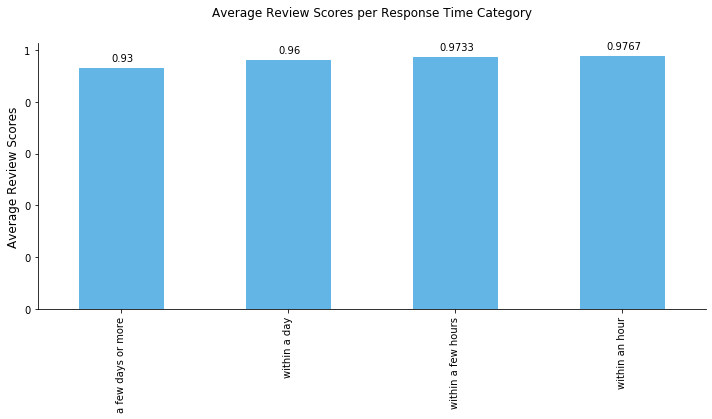

In [97]:

data = df_relationships

frequencies = df_relationships['Average_rating']

#Creating a series for the data and making the index labels
freq_series = pd.Series(frequencies)

x_labels = data.index

#Plot the figure
# Plot the figure.
plt.subplots(figsize=(10, 6))
ax = freq_series.plot(kind='bar', legend=False, color = ['#17618C', '#62B5E5'])
ax.set_title('Average Review Scores per Response Time Category',fontsize=12, y=1.08)
ax.set_xlabel('')
ax.set_ylabel('Average Review Scores', fontsize=12)
ax.set_xticklabels(x_labels, fontsize=10, rotation=90)

#ax.set_yticklabels(freq_series, fontsize=16, rotation=0)
# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Putting commas to thousands figures on the y axis
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#Set y limits

#ax.set_ylim(0, 6500)

def add_value_labels(ax, spacing=5):

    """Add labels to the end of each bar in a bar chart.
    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """
    # For each bar: Place a label
    for patch_bar in ax.patches:
        patch_bar.set_color('#62B5E5')

        # Get X and Y placement of label from patch_bar.
        y_value = patch_bar.get_height()
        x_value = patch_bar.get_x() + patch_bar.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing

        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
        # Use Y value as label and format number with no decimals
        label = y_value
        #label = y_value.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        
        # Create annotation
        ax.annotate(
            str(round(label, 4)),                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(1.4, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            color ='black', rotation=0, fontsize=10) # Vertically align label differently for
                                        # positive and negative values.

# Call the function above.
add_value_labels(ax)
plt.tight_layout()

In [26]:
# # regex plot
# plt.figure(figsize=(13,7))
# sns.regplot(x=more_than_5_rev['host_response_rate'], y=more_than_5_rev['Average_rating']);

### Business Question 2: Do superhosts tend to charge more that the non-superhosts?

In [98]:
last_df.head(2)

,reviewers_count,median_price,host_response_time,host_response_rate,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_is_superhost,property_type,Average_rating,win_median_price,price_category
1000883,18.00,100.00,within a few hours,86.00,100.00,3.00,0.00,2.00,18.00,0.99,1.00,1.00,1.00,1.00,1.00,0.59,f,House,1.00,100.00,100 to 120 Dollars
1002835,6.00,135.00,within a day,70.00,135.00,4.00,20.00,2.00,6.00,0.80,0.80,0.70,0.80,1.00,0.80,0.31,f,Apartment,0.82,135.00,120 to 140 Dollars


In [99]:
last_df['host_is_superhost'].value_counts()

f    1407
t     644
Name: host_is_superhost, dtype: int64

In [100]:
#subset the 2 dataframes based on superhosts
superhost_t_df = last_df[last_df['host_is_superhost'] == 't']
superhost_f_df = last_df[last_df['host_is_superhost'] == 'f']

In [101]:
#Median prices for both dataframes
print(f"Median for superhosts: {superhost_t_df['median_price'].median()}")
print(f"Mean for superhosts: {superhost_t_df['median_price'].mean()}")
print(f"Median for non-superhosts: {superhost_f_df['median_price'].median()}")
print(f"Mean for non-superhosts: {superhost_f_df['median_price'].mean()}")

Median for superhosts: 105.0
Mean for superhosts: 131.7996894409938
Median for non-superhosts: 100.0
Mean for non-superhosts: 124.04513148542999


Functions to compare different price categories for superhosts and non-superhosts

In [102]:
def get_normalized_val_counts(df, col):
    '''
    INPUTS
        df-a dataframe
        col- a column that we want to calculate the value_counts
    OUTPUT
        a dataframe of value_counts of col
    '''
    
    #Get the value counts of the col and edit the column names
    val_count_df = pd.DataFrame(df[col].value_counts(dropna=False).reset_index())
    val_count_df.rename(columns={'index': col, col: 'count'}, inplace=True)
    val_count_df.set_index(col, inplace=True)
    props_val_count = val_count_df/val_count_df.sum()
    
    return props_val_count

In [103]:
#Get listings for superhosts and non-superhosts
superhosts_list = superhost_t_df.index.tolist()
non_superhosts_list =superhost_f_df.index.unique().tolist()

#
dict_bin_cols = {'host_is_superhost': superhosts_list}

def choose_col_cat(bin_col, cat_col):
    '''
    INPUT:
        bin_col-a binary column that will be used to disect other categorical variables
        cat_col - a categorical column that you want to disect
        
    OUTPUT: A bar presentation of valuecounts percentages of dataframes separated by the bin_col values
    '''
    
    #Separate the dataframes where one bin col is present or absent
    element_present = last_df[last_df.index.isin(dict_bin_cols[bin_col])]
    element_absent = last_df[~last_df.index.isin(dict_bin_cols[bin_col])]
    
    #Create the percentages
    element_true_perc = get_normalized_val_counts(element_present, cat_col)
    element_false_perc = get_normalized_val_counts(element_absent, cat_col)
    
    #merge the 2 dataframes for comparison
    comp_df = pd.merge(element_true_perc, element_false_perc, left_index = True, right_index=True)
    comp_df.columns = [bin_col + '_True', bin_col + '_False']
    comp_df['Diff_Vals'] = comp_df[bin_col + '_True'] - comp_df[bin_col + '_False']
    #return comp_df.style.bar(subset=['Diff_Vals'], align='mid', color = ['#d65f5f', '#5fba7d'])
    return comp_df

In [104]:
last_df['win_median_price'] = last_df['median_price']
last_df.loc[last_df['win_median_price']>200 , 'win_median_price'] = 201

#Create median prices category
bins = [i for i in range(0,240,20)]

names = [str(i) + " to " + str(bins[ind+1]) + ' Dollars' for i,ind in zip(bins, list(range(len(bins)))) if ind <10] + ["More than 200 Dollars"]

d = dict(enumerate(names, 1))

last_df['price_category'] = np.vectorize(d.get)(np.digitize(last_df['win_median_price'], bins))

In [105]:
price_df = choose_col_cat('host_is_superhost', 'price_category')
price_df['sort'] = price_df.index
price_df['sort'] = price_df['sort'].apply(lambda x: x.split(" ")[0])
price_df['sort'] = price_df['sort'].str.replace("More", str(200))
price_df['sort'] = price_df['sort'].astype(int)
price_df = price_df.sort_values(by =['sort'], ascending=[True])
price_df = price_df.drop('sort', axis=1)

price_df = price_df.rename(columns = {'host_is_superhost_True': 'Superhost \n(Percentage)', 
                                      'host_is_superhost_False': 'Non-Superhosts \n(Percentage)',
                                      'Diff_Vals': "Proportional Difference"})
for col in ['Superhost \n(Percentage)', 'Non-Superhosts \n(Percentage)', 'Proportional Difference']:
    price_df[col] = price_df[col].apply(lambda x: int(round((x*100),0)))
    #price_df[col] = price_df[col]
price_df.style.bar(subset=['Proportional Difference'], align='mid', color = ['#d65f5f', '#5fba7d'])

,Superhost (Percentage),Non-Superhosts (Percentage),Proportional Difference
price_category,,,
20 to 40 Dollars,0,4,-3
40 to 60 Dollars,6,12,-6
60 to 80 Dollars,17,15,2
80 to 100 Dollars,22,18,4
100 to 120 Dollars,12,11,1
120 to 140 Dollars,11,10,1
140 to 160 Dollars,9,8,0
160 to 180 Dollars,5,5,1
180 to 200 Dollars,3,4,-1


Based on the above, there could be a scant evidence that superhosts tend to charge slightly higher price than non-superhosts

### Business Question 3: What property type are more people interested in and does it affect the pricing?

In [82]:
last_df.head(2)

,reviewers_count,median_price,host_response_time,host_response_rate,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_is_superhost,property_type,Average_rating,win_median_price,price_category
1000883,18.00,100.00,within a few hours,86.00,100.00,3.00,0.00,2.00,18.00,0.99,1.00,1.00,1.00,1.00,1.00,0.59,f,House,1.00,100.00,100 to 120 Dollars
10012724,2.00,25.00,within an hour,100.00,25.00,1.00,0.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,f,Apartment,1.00,25.00,20 to 40 Dollars


I will first check the popularity of each property type by using the number of reviewers

In [106]:
count_popularity = last_df.groupby('property_type').agg({'reviewers_count': 'median', 'reviews_per_month': 'median'})

count_popularity.sort_values(by='reviewers_count', ascending=False, inplace=True)

In [107]:
count_popularity.head()

,reviewers_count,reviews_per_month
property_type,,
Camper/RV,80.00,3.69
Cabin,66.00,3.53
Other,48.50,3.50
Loft,39.00,3.32
House,25.00,2.28


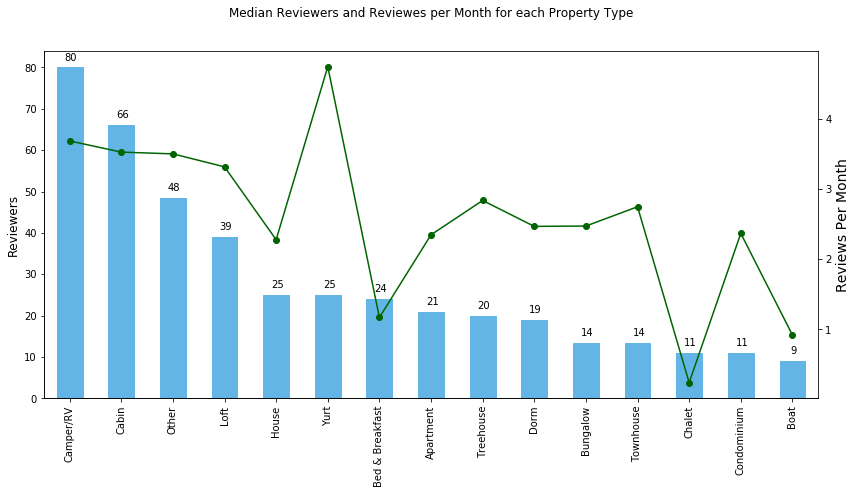

In [108]:
#Plot the above
data = count_popularity

frequencies = count_popularity['reviewers_count']

#Creating a series for the data and making the index labels
freq_series = pd.Series(frequencies)

x_labels = data.index

#Plot the figure
# Plot the figure.
plt.subplots(figsize=(12, 7))
ax = freq_series.plot(kind='bar', legend=False, color = ['#17618C', '#62B5E5'])
ax.set_title('Median Reviewers and Reviewes per Month for each Property Type',fontsize=12, y=1.08)
ax.set_xlabel('')
ax.set_ylabel('Reviewers', fontsize=12)
ax.set_xticklabels(x_labels, fontsize=10, rotation=90)

#ax.set_yticklabels(freq_series, fontsize=16, rotation=0)
# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Putting commas to thousands figures on the y axis
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#Set y limits

#ax.set_ylim(0, 6500)

def add_value_labels(ax, spacing=5):

    """Add labels to the end of each bar in a bar chart.
    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """
    # For each bar: Place a label
    for patch_bar in ax.patches:
        patch_bar.set_color('#62B5E5')
        
        # Get X and Y placement of label from patch_bar.
        y_value = patch_bar.get_height()
        x_value = patch_bar.get_x() + patch_bar.get_width() / 2
        
        # Number of points between bar and label. Change to your liking.
        space = spacing

        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
        # Use Y value as label and format number with no decimals
        label = "{:.0f}".format(y_value)
        #label = y_value.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        
        # Create annotation
        ax.annotate(
            str("{:,}".format(int(label))),                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(1.4, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            color ='black', rotation=0, fontsize=10) # Vertically align label differently for
                                        # positive and negative values.
            
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(count_popularity.index, count_popularity["reviews_per_month"], color="darkgreen", marker="o")
ax2.set_ylabel("Reviews Per Month",color="black",fontsize=14)

# Call the function above.
add_value_labels(ax)
plt.tight_layout()

This chart shows that generally, Camper/RV, Cabin, and Yurt were some of the most popular property types based on the number of reviewers. The reviews per month shows a slightly different picture and can be interpreted as even if some other properties like Yurt had fewer reviewers, they were more enthusiastic and could have posted multiple reviews.

Pricing

In [109]:
pricing_df = pd.DataFrame(last_df.groupby('property_type')['price'] \
                     .median()) \
                     .rename(columns={'price': 'Median Price'}) \
                     .sort_values(by='Median Price', ascending=False)

In [110]:
#merge the 2 dataframes
merged_prop_type = pricing_df.merge(count_popularity, left_index=True, right_index=True)
merged_prop_type = merged_prop_type.sort_values(by='reviewers_count', ascending=False)
merged_prop_type.head()

,Median Price,reviewers_count,reviews_per_month
property_type,,,
Camper/RV,75.00,80.00,3.69
Cabin,95.00,66.00,3.53
Other,72.50,48.50,3.50
Loft,102.50,39.00,3.32
Yurt,100.00,25.00,4.75


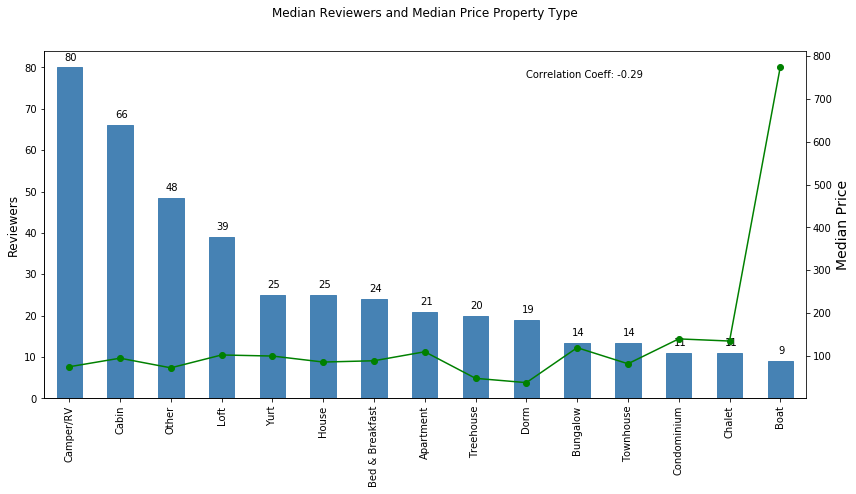

In [111]:
data = merged_prop_type

frequencies = merged_prop_type['reviewers_count']

#Creating a series for the data and making the index labels
freq_series = pd.Series(frequencies)

x_labels = data.index

#Plot the figure
# Plot the figure.
plt.subplots(figsize=(12, 7))
ax = freq_series.plot(kind='bar', legend=False, color = ['#17618C', '#62B5E5'])
ax.set_title('Median Reviewers and Median Price Property Type',fontsize=12, y=1.08)
ax.set_xlabel('')
ax.set_ylabel('Reviewers', fontsize=12)
ax.set_xticklabels(x_labels, fontsize=10, rotation=90)

#ax.set_yticklabels(freq_series, fontsize=16, rotation=0)
# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Putting commas to thousands figures on the y axis
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#Set y limits

#ax.set_ylim(0, 6500)

def add_value_labels(ax, spacing=5):

    """Add labels to the end of each bar in a bar chart.
    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """
    # For each bar: Place a label
    for patch_bar in ax.patches:
        patch_bar.set_color('steelblue')
        
        # Get X and Y placement of label from patch_bar.
        y_value = patch_bar.get_height()
        x_value = patch_bar.get_x() + patch_bar.get_width() / 2
        
        # Number of points between bar and label. Change to your liking.
        space = spacing

        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
        # Use Y value as label and format number with no decimals
        label = "{:.0f}".format(y_value)
        #label = y_value.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        
        # Create annotation
        ax.annotate(
            str("{:,}".format(int(label))),                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(1.4, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            color ='black', rotation=0, fontsize=10) # Vertically align label differently for
                                        # positive and negative values.
            
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(merged_prop_type.index, merged_prop_type["Median Price"], color="g", marker="o")
ax2.set_ylabel("Median Price",color="black",fontsize=14)

plt.text(9,750, f"Correlation Coeff: {round(merged_prop_type['Median Price'].corr(merged_prop_type['reviewers_count']), 2)}")

# Call the function above.
add_value_labels(ax)
plt.tight_layout()

As shown in the chart, the Median Price and number of Reviewers per property type are polar oppisites. An increases in popularity of a property type has a corresponding decrease in associated price. This shows that more people are attracted to the low priced listings.

In [44]:
merged_prop_type['Median Price'].corr(merged_prop_type['Reviewers_Count'])

-0.2904479116315599

Even the correlation coefficient above shows the negative relationship

### Conclusion of the Analysis

In conclusion, the AirBnB dataset has different interesting attributes that can identify quality of service of a host and the price of a listing. One of the observation is that whether a listing is made by super-host or non-super-host and the number of reviewers per listing can be used among the factors to determine the price of a listing. On the other hand, reviews per month cannot be classified among factors that can determine the price of a listing. Additionally, the faster the response of a host to a request, the higher probability that the host will offer high quality services.